In [49]:
# We have to prepare our workspace, thats all we need.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
df = pd.read_csv("C:\\Users\\green\\train.csv") # here is path to train data

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13765201 entries, 0 to 13765200
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   minutes_past           int64  
 2   radardist_km           float64
 3   Ref                    float64
 4   Ref_5x5_10th           float64
 5   Ref_5x5_50th           float64
 6   Ref_5x5_90th           float64
 7   RefComposite           float64
 8   RefComposite_5x5_10th  float64
 9   RefComposite_5x5_50th  float64
 10  RefComposite_5x5_90th  float64
 11  RhoHV                  float64
 12  RhoHV_5x5_10th         float64
 13  RhoHV_5x5_50th         float64
 14  RhoHV_5x5_90th         float64
 15  Zdr                    float64
 16  Zdr_5x5_10th           float64
 17  Zdr_5x5_50th           float64
 18  Zdr_5x5_90th           float64
 19  Kdp                    float64
 20  Kdp_5x5_10th           float64
 21  Kdp_5x5_50th           float64
 22  Kdp_5x5_90th    

In [52]:
df.groupby(['Id']).mean().head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,29.083,2.000,16.625,13.667,17.375,21.333,22.667,20.375,22.917,25.917,...,1.000,0.380,0.120,0.417,0.781,-0.288,-1.449,-0.319,1.117,1.016
3,30.750,10.000,NaN,NaN,NaN,8.500,NaN,NaN,NaN,8.500,...,0.802,NaN,NaN,NaN,2.062,NaN,NaN,NaN,NaN,26.162
4,28.154,9.000,26.600,20.071,25.800,30.269,26.667,21.091,25.115,32.231,...,1.016,-1.125,NaN,0.500,1.516,7.030,NaN,0.000,6.330,4.064
5,28.714,13.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700


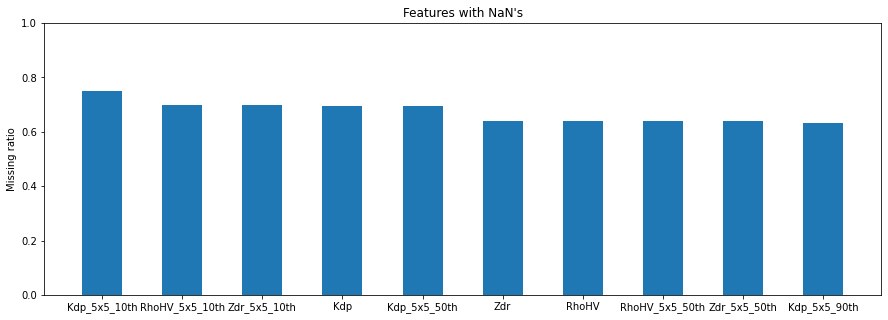

In [53]:
# Columns with highest amount of NaN's
fig, ax = plt.subplots(figsize = (15, 5))
df_NaN = (df.isnull().sum() / len(df))
df_NaN = df_NaN.drop(df_NaN[df_NaN == 0].index).sort_values(ascending = False)[: 10]
ax.bar(range(df_NaN.size), df_NaN, width = 0.5)
plt.xticks(range(df_NaN.size), df_NaN.index, rotation = 0)
plt.ylim([0, 1])
plt.title("Features with NaN's")
plt.ylabel('Missing ratio')
plt.show()

In [54]:
df.fillna(0, inplace = True) # Getting rid of NaN's

In [55]:
df.isna().sum()

Id                       0
minutes_past             0
radardist_km             0
Ref                      0
Ref_5x5_10th             0
Ref_5x5_50th             0
Ref_5x5_90th             0
RefComposite             0
RefComposite_5x5_10th    0
RefComposite_5x5_50th    0
RefComposite_5x5_90th    0
RhoHV                    0
RhoHV_5x5_10th           0
RhoHV_5x5_50th           0
RhoHV_5x5_90th           0
Zdr                      0
Zdr_5x5_10th             0
Zdr_5x5_50th             0
Zdr_5x5_90th             0
Kdp                      0
Kdp_5x5_10th             0
Kdp_5x5_50th             0
Kdp_5x5_90th             0
Expected                 0
dtype: int64

In [56]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [57]:
df.describe()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
count,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,...,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000,13765201.000
mean,592336.987,29.524,11.068,10.575,7.659,10.441,14.207,12.057,9.265,11.907,...,0.436,0.192,-0.216,0.121,0.889,0.011,-0.867,-0.144,1.498,108.626
std,340856.086,17.308,4.207,13.419,11.256,13.181,15.291,14.433,12.602,14.212,...,0.504,0.940,0.642,0.585,1.500,2.133,2.052,1.267,3.191,548.606
min,1.000,0.000,0.000,-31.000,-32.000,-32.000,-28.500,-32.000,-31.000,-27.500,...,0.000,-7.875,-7.875,-7.875,-7.875,-96.040,-80.790,-78.770,-100.200,0.010
25%,296897.000,15.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
50%,592199.000,30.000,11.000,0.000,0.000,0.000,11.500,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.016
75%,889582.000,44.000,14.000,21.500,16.500,21.500,27.000,24.000,19.500,23.500,...,1.002,0.000,0.000,0.000,1.500,0.000,0.000,0.000,2.460,3.810
max,1180945.000,59.000,21.000,71.000,62.500,69.000,72.500,92.500,66.000,71.000,...,1.052,7.938,7.938,7.938,7.938,179.750,3.520,12.800,144.600,33017.730


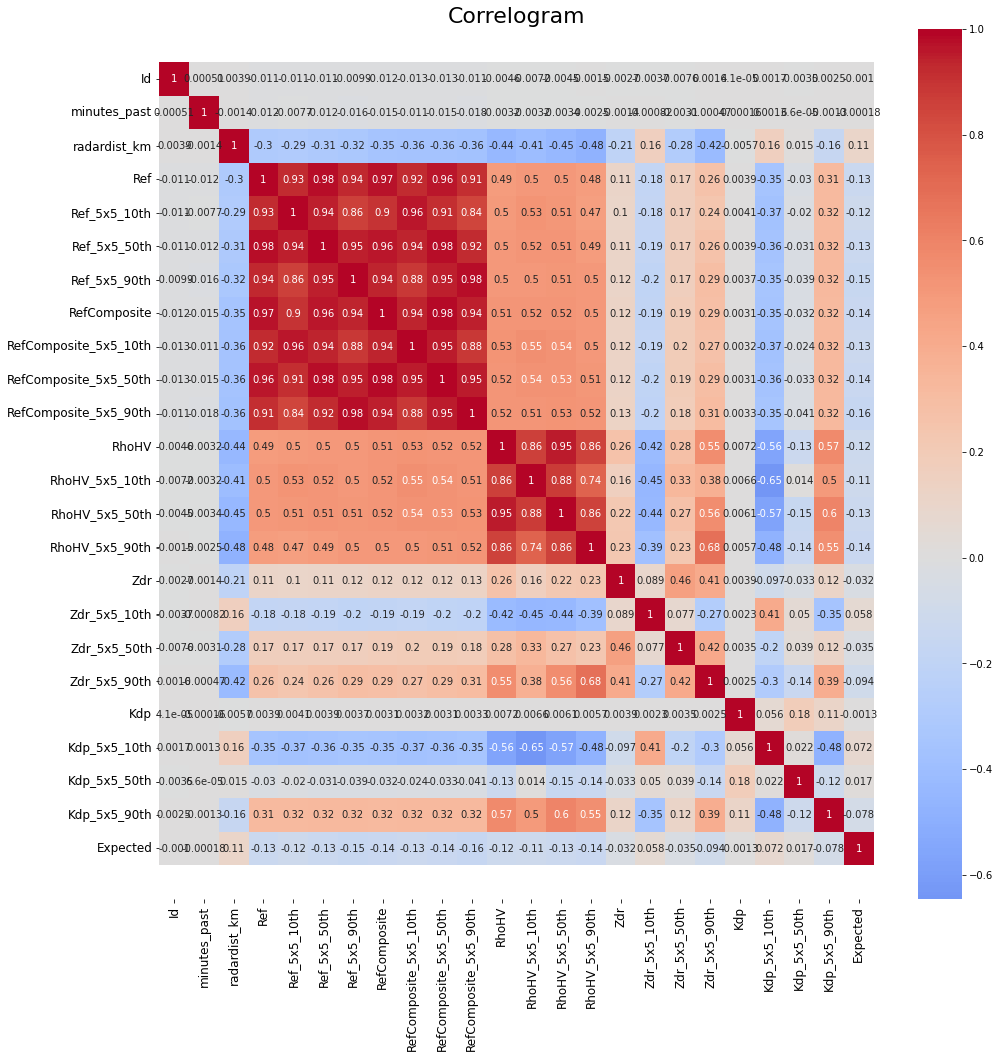

In [58]:
# Plot
corr = df.corr()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(corr, 
                 xticklabels=df.corr().columns, 
                 yticklabels=df.corr().columns, 
                 cmap='coolwarm', 
                 center=0, 
                 annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [59]:
df[["Expected"]].describe()
#By compering mean with 75% percentile,
#we can see that we have outliers in our dataset

,Expected
count,13765201.000
mean,108.626
std,548.606
min,0.010
25%,0.254
50%,1.016
75%,3.810
max,33017.730


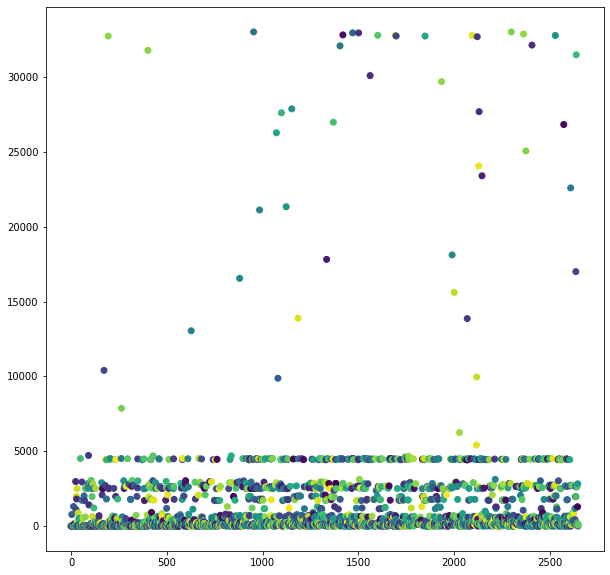

In [60]:
# looking for outliers
N = 2649
N1 = 1041
colors = np.random.rand(N)
colors1 = np.random.rand(N1)
plt.figure(figsize=(10, 10))
plt.scatter(np.arange(len(df["Expected"].unique())), df["Expected"].unique(),c=colors)

In [61]:
print(stats.percentileofscore(df["Expected"], 106))

92.94511573060211


In [62]:
# Getting rid of ouliers
df.drop(df[df["Expected"] >= 106].index, inplace=True)
df.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
1,1,16,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
2,1,25,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
3,1,35,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
4,1,45,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254


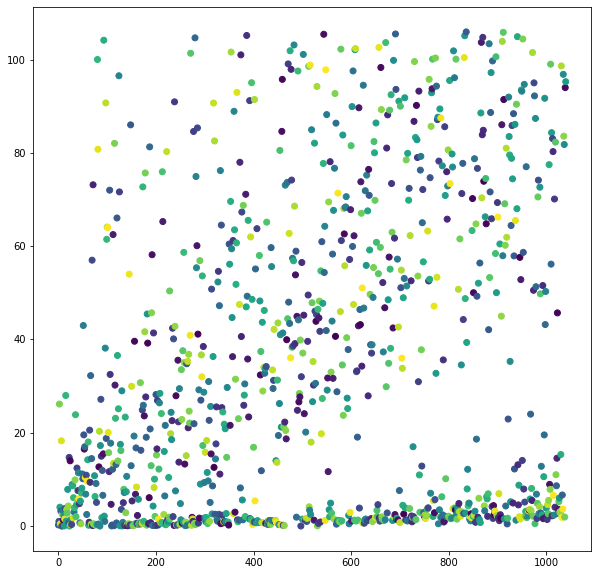

In [63]:
# our data set without outliers
plt.figure(figsize=(10, 10))
plt.scatter(np.arange(len(df["Expected"].unique())), df["Expected"].unique(),c=colors1)

In [64]:
# Grouping data by id
df_grouped = pd.DataFrame(df.groupby(['Id']).mean())

In [65]:
df_grouped.shape

(1080143, 23)

In [66]:
df_grouped.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,29.833,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
2,29.083,2.000,16.625,13.667,17.375,21.333,22.667,20.375,22.917,25.917,...,1.000,0.380,0.120,0.417,0.781,-0.264,-1.087,-0.293,1.117,1.016
3,30.750,10.000,0.000,0.000,0.000,0.708,0.000,0.000,0.000,0.708,...,0.067,0.000,0.000,0.000,0.172,0.000,0.000,0.000,0.000,26.162
4,28.154,9.000,20.462,10.808,19.846,30.269,24.615,17.846,25.115,32.231,...,0.313,-0.087,0.000,0.038,0.466,0.541,0.000,0.000,0.974,4.064
6,29.833,13.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254


In [67]:
target = df_grouped['Expected']

In [68]:
target.head(10)

Id
1     0.254
2     1.016
3    26.162
4     4.064
6     0.254
7     0.508
8     3.225
9    18.288
10    0.010
11    2.540
Name: Expected, dtype: float64

In [69]:
#Preparing data for next step
sample_df = df_grouped.sample(n = 200000, random_state = 42)

In [70]:
sample_df.shape

(200000, 23)

In [71]:
sample_df.isna().sum()

minutes_past             0
radardist_km             0
Ref                      0
Ref_5x5_10th             0
Ref_5x5_50th             0
Ref_5x5_90th             0
RefComposite             0
RefComposite_5x5_10th    0
RefComposite_5x5_50th    0
RefComposite_5x5_90th    0
RhoHV                    0
RhoHV_5x5_10th           0
RhoHV_5x5_50th           0
RhoHV_5x5_90th           0
Zdr                      0
Zdr_5x5_10th             0
Zdr_5x5_50th             0
Zdr_5x5_90th             0
Kdp                      0
Kdp_5x5_10th             0
Kdp_5x5_50th             0
Kdp_5x5_90th             0
Expected                 0
dtype: int64

In [72]:
scaler = StandardScaler()

In [73]:
sample_X = sample_df.drop(['minutes_past', 'Expected'], axis = 1)
sample_y = sample_df['Expected']

In [74]:
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(sample_X, sample_y, test_size = 0.2, random_state = 42)

In [75]:
s_X_train_sc = scaler.fit_transform(s_X_train)

In [76]:
s_X_test_sc = scaler.transform(s_X_test)

In [77]:
s_X_train_sc.shape, s_X_test_sc.shape

((160000, 21), (40000, 21))

In [78]:
s_y_train.shape, s_y_test.shape

((160000,), (40000,))

In [79]:
# Now we will try to find the best modell for our data.
# We will use RandomForestRegressor, XGBRegressor, Lasso.

In [80]:
#Random Forest

In [81]:
rf = RandomForestRegressor(random_state = 42)

In [82]:
rf.fit(s_X_train_sc, s_y_train)

RandomForestRegressor(random_state=42)

In [83]:
rf_preds = rf.predict(s_X_test_sc)

In [84]:
mean_absolute_error(s_y_test, rf_preds)

3.990504638543698

In [85]:
# XGB Regressor

In [86]:
xgb = XGBRegressor(random_state = 42)

In [87]:
xgb.fit(s_X_train_sc, s_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
xgb_preds = xgb.predict(s_X_test_sc)

In [89]:
mean_absolute_error(s_y_test, xgb_preds)

3.9809470877327193

In [90]:
#Lasso

In [91]:
lasso = Lasso(random_state = 42)

In [92]:
lasso.fit(s_X_train_sc, s_y_train)

Lasso(random_state=42)

In [93]:
lasso_preds = lasso.predict(s_X_test_sc)

In [94]:
mean_absolute_error(s_y_test, lasso_preds)

4.39416452730014

In [95]:
# Gradient Boosting Regressor

In [96]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(s_X_train_sc, s_y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [97]:
gbrt_preds = lasso.predict(s_X_test_sc)

In [98]:
mean_absolute_error(s_y_test, gbrt_preds)

4.39416452730014

In [ ]:
# As we can see Random Forest and and XGB Regressor have the best results.